### Данные по опросу уровня удовлетворённости сотрудниками работой

Признаки:
1. __satisfaction_level__ - Уровень удовлетворенности работой
2. __last_evaluation__ - Время с момента последней оценки в годах
3. __number_projects__ - Количество проектов, выполненных за время работы
4. __average_monthly_hours__ - Среднее количество часов на рабочем месте в месяц
5. __time_spend_company__ - Стаж работы в компании в годах
6. __work_accident__ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. __left__ - уволился ли сотрудник
8. __promotion_last_5years__ - повышался ли сотрудник за последние пять лет
9. __department__ - отдел в котором работает сотрудник
10. __salary__ - относительный уровень зарплаты

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu

In [7]:
df = pd.read_csv('HR.csv')

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Посчитайте основные показатели статистики

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.


In [11]:
# считаем коэффициенты корреляции между всеми показателями
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


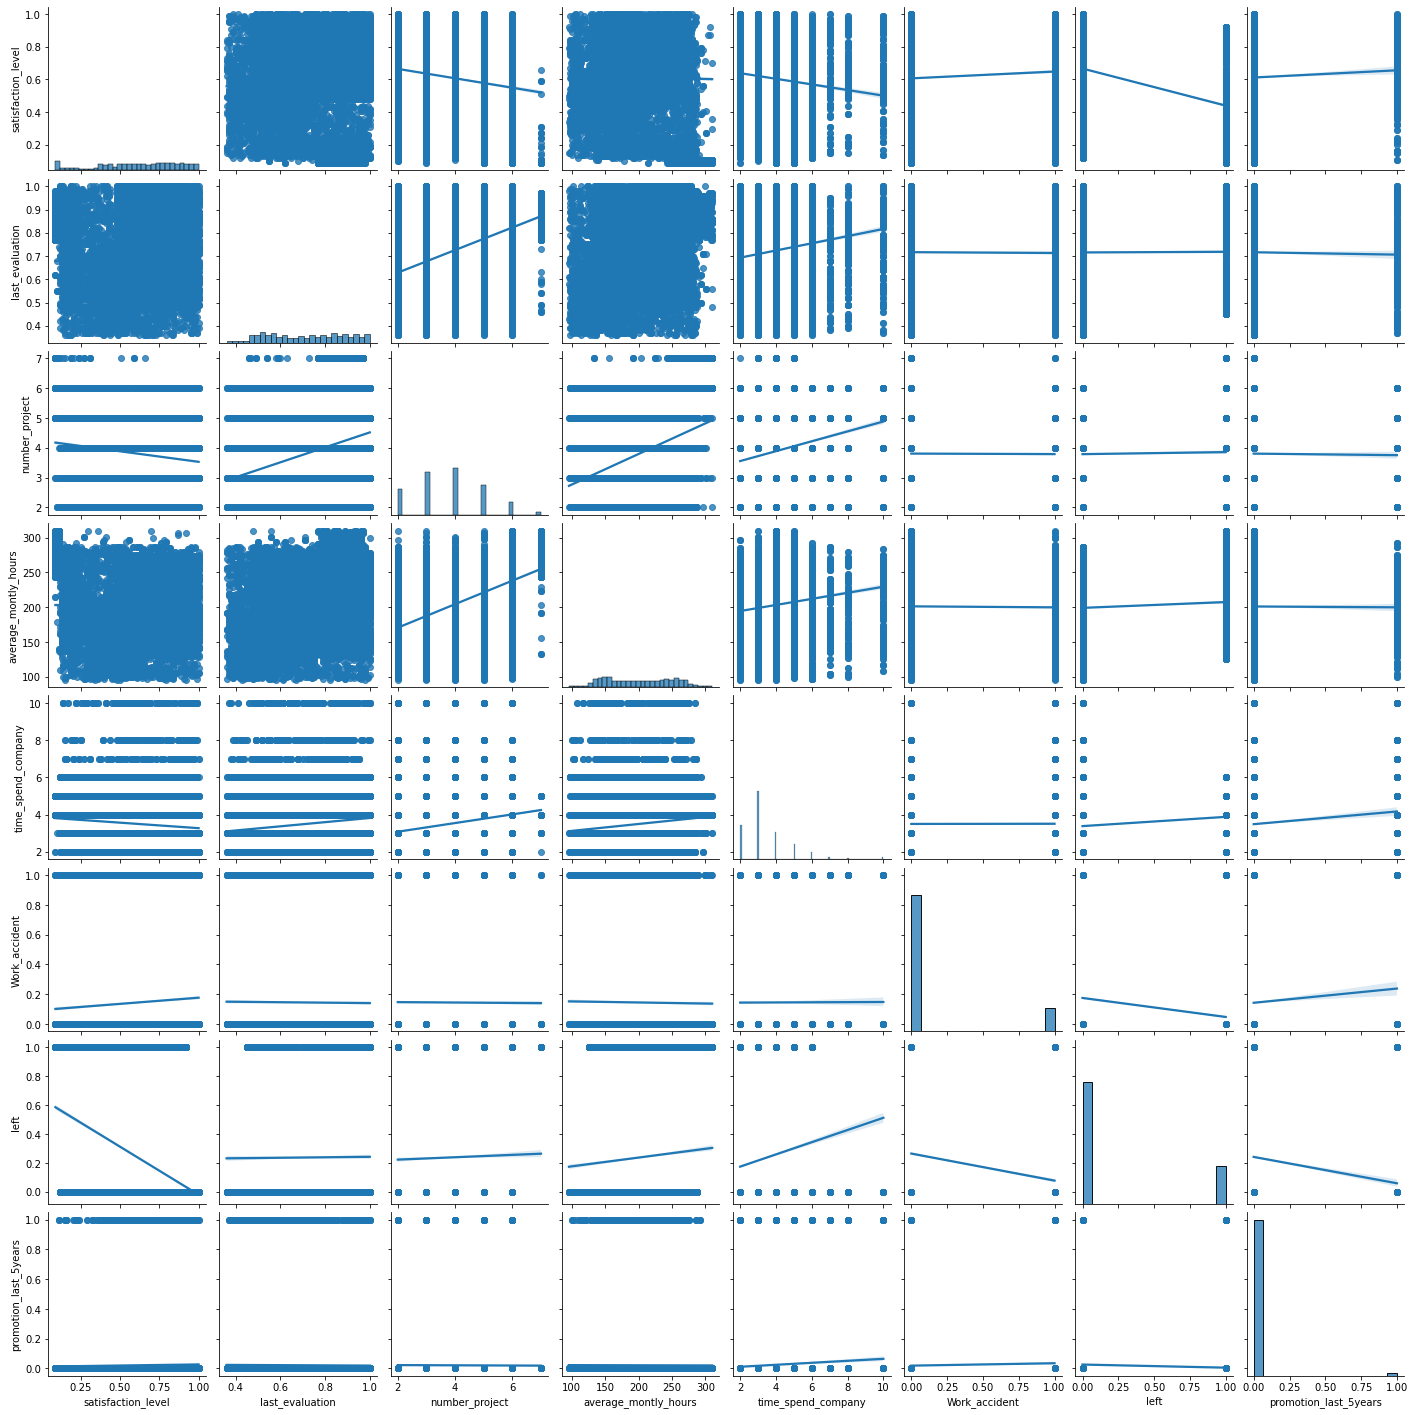

In [12]:
# визулизируем корреляцию между всеми показателями
sns.pairplot(df, kind='reg')

По таблице и на графике видим, что сильной взаимосвязи нет между всеми показателями.
Две самые сильные взаимосвязи по расчётному коэффициенту корреляции: 1. между кол-вом проектов и кол-вом часов на работу в месяц, но по графику явной взаимосвязи нет. 2. между признаком уволился ли сотрудник и уровнем удовлетворённости сотрудника, но по графику также видим, что взаимосвязи нет. 
Две самые низкие взаимосвязи: 1. между несчастными случаями и стажем работы. 2. между средним количеством часов на работе и повышением.

#### Рассчитайте сколько сотрудников работает в каждом департаменте

In [13]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Самый большой отдел - отдел продаж. Следом идут технический отдел и отдел поддержки. 

#### Показать распределение сотрудников по зарплатам

<AxesSubplot:title={'center':'Распределение сотрудников по зарплате'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

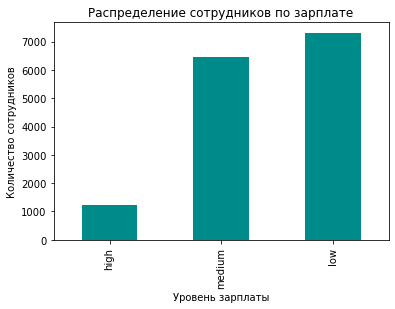

In [17]:
# Строим график для визуализации распределения по зарплате
df_salary = df[['salary', 'satisfaction_level']].groupby('salary').count().sort_values(by='satisfaction_level')
df_salary.plot(kind='bar', 
               title='Распределение сотрудников по зарплате', 
               xlabel='Уровень зарплаты', 
               ylabel='Количество сотрудников',
               color='darkcyan',
               legend=False)

In [18]:
# смотрим соотношение в долях по зарплате
df.groupby('salary').size() / len(df) * 100

salary
high       8.247216
low       48.776585
medium    42.976198
dtype: float64

Большинство сотрудников получает низкую и среднюю зарплаты. И только 8% сотрудников получает высокую зарплату.

#### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [42]:
# строим сводную таблицу уровня зарплат по отделам
df_salary_by_department = df.pivot_table(index = 'department',
                                         columns = 'salary',
                                         values = 'satisfaction_level',
                                         aggfunc = 'count')
df_salary_by_department

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<AxesSubplot:title={'center':'Распределение сотрудников по зарплате в каждом департаменте'}, xlabel='Департамент', ylabel='Количество сотрудников'>

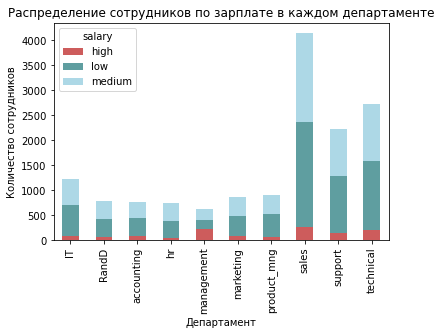

In [40]:
# строим график
df_salary_by_department.plot(kind='bar', 
               title='Распределение сотрудников по зарплате в каждом департаменте', 
               xlabel='Департамент', 
               ylabel='Количество сотрудников',
               legend=True,
               color=['indianred', 'cadetblue', 'lightblue'],             
               stacked=True)

По департаменту мы наблюдаем такую же картину как и в тотале по компании, во всех отделах преобладание низкой и средней зарплаты, высокую зарплату получает крайне мало сотрудников

#### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Принимаем нулевую гипотезу о том, что сотрудники с высоким окладом проводят на работе столько же времени, что и сотрудники с низким окладом

In [73]:
# Формируем две выборки по среднему количеству часов на рабочем месте в месяц: для сотрудников с низкой и высокой зарплатами
average_montly_hours_low = df['average_montly_hours'][df['salary']=='low'].tolist()
average_montly_hours_high = df['average_montly_hours'][df['salary']=='high'].tolist()

In [74]:
t, p_value = stats.ttest_ind(average_montly_hours_low, average_montly_hours_high) #Критерий Стьюдента (t-test)
t, p_value

(0.7288680398062308, 0.4661023478267259)

Мы получаем очень высокой значение p, равное 0,466, и, таким образом, мы одназначно отклоняем нулевую гипотезу, то есть - средние значения двух распределений различны и это различие статистически значимо --> сотрудники с разным уровнем зарплат не проводят одинаковое количество времени на работе

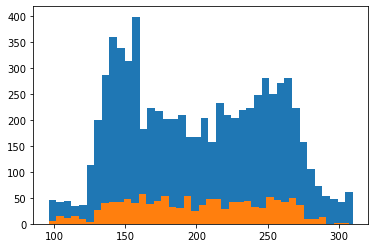

In [75]:
# Визуализируем две выборки для наглядности
plt.hist(average_montly_hours_low, bins=40); # Сотрудники с низкой зарплатой
plt.hist(average_montly_hours_high, bins=40);  # Сотрудники с высокой зарплатой

Так как распределения двух выборок сложно назвать однозначно нормальными, проведём ещё тест U-Манна Уитни

In [79]:
results = mannwhitneyu(average_montly_hours_low, average_montly_hours_high)
results

MannwhitneyuResult(statistic=4542795.5, pvalue=0.8241330720858693)

Мы также получаем высокой значение p-value и также отвергаем нулевую гипотезу

#### Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- __Доля сотрудников с повышением за последние 5 лет__
- __Средняя степень удовлетворенности__
- __Среднее количество проектов__

In [82]:
# Делим на два датафрейма: уволившиеся сотрудники и не уволившиеся
df_left = df[df['left']==1]
df_not_left = df[df['left']==0]

In [83]:
# Доля повышения за последние 5 лет среди уволившихся сотрудников
df_left.groupby('promotion_last_5years').size() / len(df_left) * 100

promotion_last_5years
0    99.467936
1     0.532064
dtype: float64

In [84]:
# Доля повышения за последние 5 лет среди не уволившихся сотрудников
df_not_left.groupby('promotion_last_5years').size() / len(df_not_left) * 100

promotion_last_5years
0    97.374869
1     2.625131
dtype: float64

Доля сотрудников, которые получили повышение за последние 5 лет среди не уволившихся сотрудников выше чем среди уволившихся и составляет - 2.6%

In [85]:
# Средняя степень удовлетворенности среди уволившихся сотрудников
df_left['satisfaction_level'].mean()

0.44009801176140917

In [87]:
# Средняя степень удовлетворенности среди не уволившихся сотрудников
df_not_left['satisfaction_level'].mean()

0.666809590479516

Средняя степень удовлетворённости выше на 22% среди не уволившихся сотрудников и составляет 66.6%

In [89]:
# Среднее количество проектов, выполненных за время работы среди уволившихся сотрудников
df_left['number_project'].mean()

3.8555026603192384

In [91]:
# Среднее количество проектов, выполненных за время работы среди не уволившихся сотрудников
df_not_left['number_project'].mean()

3.786664333216661

Среднее количество проектов среди уволившихся и не уволившихся сотрудников практически одинаковое